# **1. Perkenalan Dataset**


## Diabetes di Amerika Serikat: Fakta dan Angka Penting

Diabetes adalah salah satu **penyakit kronis paling umum** di Amerika Serikat, memengaruhi jutaan orang Amerika setiap tahunnya dan menimbulkan beban finansial yang signifikan bagi perekonomian.

### Apa Itu Diabetes?

Diabetes adalah penyakit kronis serius di mana seseorang kehilangan kemampuan untuk mengatur kadar glukosa (gula) dalam darah secara efektif. Kondisi ini dapat menurunkan kualitas hidup dan harapan hidup.

Ketika makanan dipecah menjadi gula saat pencernaan, gula tersebut dilepaskan ke dalam aliran darah. Ini memicu pankreas untuk melepaskan insulin. Insulin membantu sel-sel dalam tubuh menggunakan gula dalam aliran darah untuk energi. Diabetes umumnya ditandai oleh tubuh yang tidak menghasilkan cukup insulin atau tidak dapat menggunakan insulin yang dihasilkan seefektif yang dibutuhkan.

### Komplikasi dan Dampak

Tingginya kadar gula darah secara kronis pada penderita diabetes dapat menyebabkan berbagai komplikasi serius, seperti:

* Penyakit jantung
* Kehilangan penglihatan
* Amputasi anggota tubuh bagian bawah
* Penyakit ginjal

Meskipun belum ada obat untuk diabetes, strategi seperti **menurunkan berat badan, makan sehat, aktif bergerak, dan menjalani perawatan medis** dapat mengurangi dampak buruk penyakit ini pada banyak pasien. Diagnosis dini dapat mengarah pada perubahan gaya hidup dan pengobatan yang lebih efektif, menjadikan model prediksi risiko diabetes sebagai alat penting bagi pejabat kesehatan masyarakat.

### Skala Masalah

Skala masalah diabetes di AS sangat besar. Pusat Pengendalian dan Pencegahan Penyakit (CDC) melaporkan data sebagai berikut:

* Pada tahun 2018, **34,2 juta** orang Amerika menderita diabetes.
* **88 juta** orang Amerika menderita pradiabetes.

Yang mengkhawatirkan adalah banyak dari mereka tidak menyadari risikonya:

* Diperkirakan **1 dari 5** penderita diabetes tidak menyadari bahwa mereka mengidapnya.
* Sekitar **8 dari 10** penderita pradiabetes tidak menyadari risiko mereka.

Meskipun ada berbagai jenis diabetes, **diabetes tipe II** adalah bentuk yang paling umum. Prevalensinya bervariasi berdasarkan usia, pendidikan, pendapatan, lokasi, ras, dan determinan sosial kesehatan lainnya. Beban penyakit ini sebagian besar menimpa mereka yang memiliki status sosial ekonomi lebih rendah.

### Beban Ekonomi

Diabetes juga membebani perekonomian secara masif:

* Biaya diabetes yang terdiagnosis mencapai sekitar **$327 miliar** dolar.
* Total biaya, termasuk diabetes yang tidak terdiagnosis dan pradiabetes, mendekati **$400 miliar** dolar setiap tahunnya.

Dataset diabetes_012_health_indicators_BRFSS2015.csv adalah kumpulan data yang telah dibersihkan (clean dataset) yang berisi 253.680 respons survei dari BRFSS2015 (Behavioral Risk Factor Surveillance System tahun 2015) yang dilakukan oleh CDC (Centers for Disease Control and Prevention).

Ini adalah dataset yang sangat berguna untuk penelitian atau analisis terkait diabetes, terutama untuk membangun model prediksi.

Variabel Target (Target Variable): Diabetes_012
Variabel kunci dalam dataset ini adalah Diabetes_012. Ini adalah variabel target (atau variabel dependen) yang ingin Anda prediksi atau pahami hubungannya dengan fitur-fitur lain. Variabel ini memiliki 3 kelas (kategori) yang menunjukkan status diabetes responden:

0: Mengindikasikan tidak ada diabetes atau hanya diabetes selama kehamilan (gestational diabetes). Ini biasanya berarti responden tidak didiagnosis dengan diabetes kronis.
(Kelas 1 dan 2 akan melengkapi penjelasan status diabetes lainnya, meskipun detailnya tidak Anda sertakan di sini. Biasanya, ini akan mewakili "prediabetes" dan "diabetes" secara penuh).

# **2. Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import nbformat 

import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample, shuffle

import re
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder
import joblib
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
#Type your code here
df = pd.read_csv('../diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
df["Diabetes_012"] = df["Diabetes_012"].astype(int)
df["HighBP"] = df["HighBP"].astype(int)
df["HighChol"] = df["HighChol"].astype(int)
df["CholCheck"] = df["CholCheck"].astype(int)
df["BMI"] = df["BMI"].astype(int)
df["Smoker"] = df["Smoker"].astype(int)
df["Stroke"] = df["Stroke"].astype(int)
df["HeartDiseaseorAttack"] = df["HeartDiseaseorAttack"].astype(int)
df["PhysActivity"] = df["PhysActivity"].astype(int)
df["Fruits"] = df["Fruits"].astype(int) 
df["Veggies"] = df["Veggies"].astype(int)
df["HvyAlcoholConsump"] = df["HvyAlcoholConsump"].astype(int)
df["AnyHealthcare"] = df["AnyHealthcare"].astype(int)
df["NoDocbcCost"] = df["NoDocbcCost"].astype(int)
df["GenHlth"] = df["GenHlth"].astype(int)
df["MentHlth"] = df["MentHlth"].astype(int)
df["PhysHlth"] = df["PhysHlth"].astype(int)
df["DiffWalk"] = df["DiffWalk"].astype(int)
df["Sex"] = df["Sex"].astype(int)
df["Age"] = df["Age"].astype(int)
df["Education"] = df["Education"].astype(int)
df["Income"] =df["Income"].astype(int)

In [6]:
df.rename(columns={"Diabetes_012": "isDiabetes"}, inplace=True)

In [7]:
df.head()

,isDiabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [8]:
def apply_data_mapping(df):
    df = df.copy()

    df["isDiabetes"] = df["isDiabetes"].map({0: "No Diabetes", 1: "Pre-Diabetes", 2: "Diabetes"})

    age_mapping = {
        1: '18 to 24', 2: '25 to 29', 3: '30 to 34', 4: '35 to 39', 5: '40 to 44',
        6: '45 to 49', 7: '50 to 54', 8: '55 to 59', 9: '60 to 64', 10: '65 to 69',
        11: '70 to 74', 12: '75 to 79', 13: '80 or older'
    }
    df["Age"] = df["Age"].map(age_mapping)

    binary_map = {0: "No", 1: "Yes"}
    df["HighBP"] = df["HighBP"].map({0: "No High", 1: "High BP"})
    df["HighChol"] = df["HighChol"].map({0: "No High Cholesterol", 1: "High Cholesterol"})
    df["CholCheck"] = df["CholCheck"].map({
        0: "No Cholesterol Check in 5 Years",
        1: "Cholesterol Check in 5 Years"
    })
    for col in ["Smoker", "Stroke", "HeartDiseaseorAttack", "PhysActivity",
                "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare",
                "NoDocbcCost", "DiffWalk"]:
        df[col] = df[col].map(binary_map)

    df["GenHlth"] = df["GenHlth"].map({
        5: "Excellent", 4: "Very Good", 3: "Good", 2: "Fair", 1: "Poor"
    })


    df["Sex"] = df["Sex"].map({0: "Female", 1: "Male"})

    df["Education"] = df["Education"].map({
        1: "Never Attended School", 2: "Elementary", 3: "Junior High School",
        4: "Senior High School", 5: "Undergraduate Degree", 6: "Magister"
    })

    df["Income"] = df["Income"].map({
        1: "Less Than $10,000", 2: "Less Than $10,000", 3: "Less Than $10,000",
        4: "Less Than $10,000", 5: "Less Than $35,000", 6: "Less Than $35,000",
        7: "Less Than $35,000", 8: "$75,000 or More"
    })

    return df


In [9]:
data_mapping = apply_data_mapping(df)

In [10]:
data_mapping.head()

,isDiabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,40,Yes,No,No,No,No,...,Yes,No,Excellent,18,15,Yes,Female,60 to 64,Senior High School,"Less Than $10,000"
1,No Diabetes,No High,No High Cholesterol,No Cholesterol Check in 5 Years,25,Yes,No,No,Yes,No,...,No,Yes,Good,0,0,No,Female,50 to 54,Magister,"Less Than $10,000"
2,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,28,No,No,No,No,Yes,...,Yes,Yes,Excellent,30,30,Yes,Female,60 to 64,Senior High School,"$75,000 or More"
3,No Diabetes,High BP,No High Cholesterol,Cholesterol Check in 5 Years,27,No,No,No,Yes,Yes,...,Yes,No,Fair,0,0,No,Female,70 to 74,Junior High School,"Less Than $35,000"
4,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,24,No,No,No,Yes,Yes,...,Yes,No,Fair,3,0,No,Female,70 to 74,Undergraduate Degree,"Less Than $10,000"


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_38988\1882857010.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_mapping, x='isDiabetes', palette='Set2', order=['No Diabetes', 'Pre-Diabetes', 'Diabetes'])


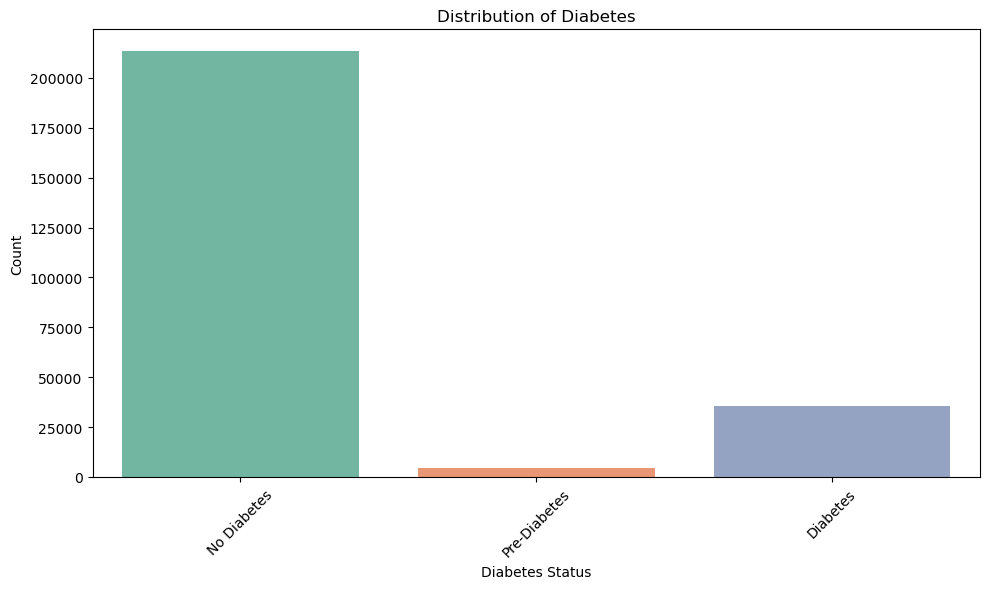

In [11]:
# distribution of diabetes
plt.figure(figsize=(10, 6))
sns.countplot(data=data_mapping, x='isDiabetes', palette='Set2', order=['No Diabetes', 'Pre-Diabetes', 'Diabetes'])
plt.title('Distribution of Diabetes')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

array([[<Axes: title={'center': 'isDiabetes'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'cen

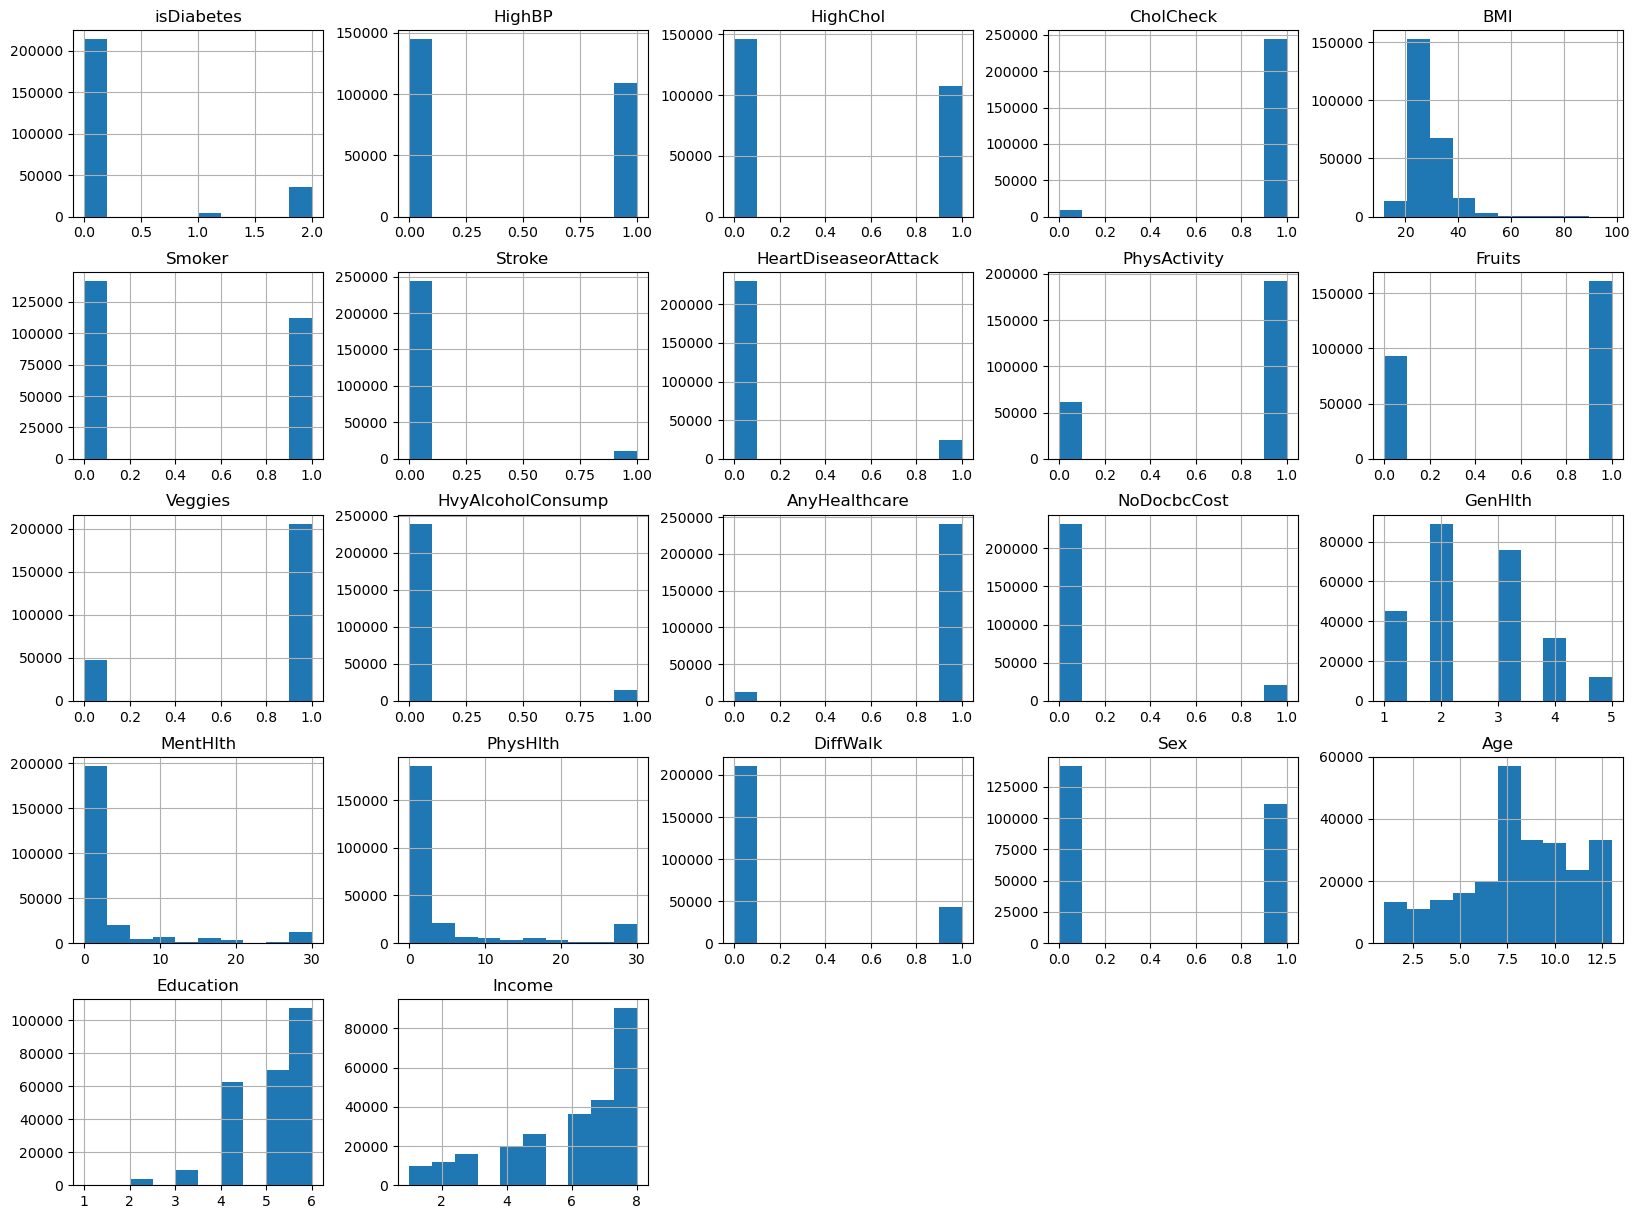

In [12]:
#using histogram to understand dataset data better
df.hist(figsize=(20,15))

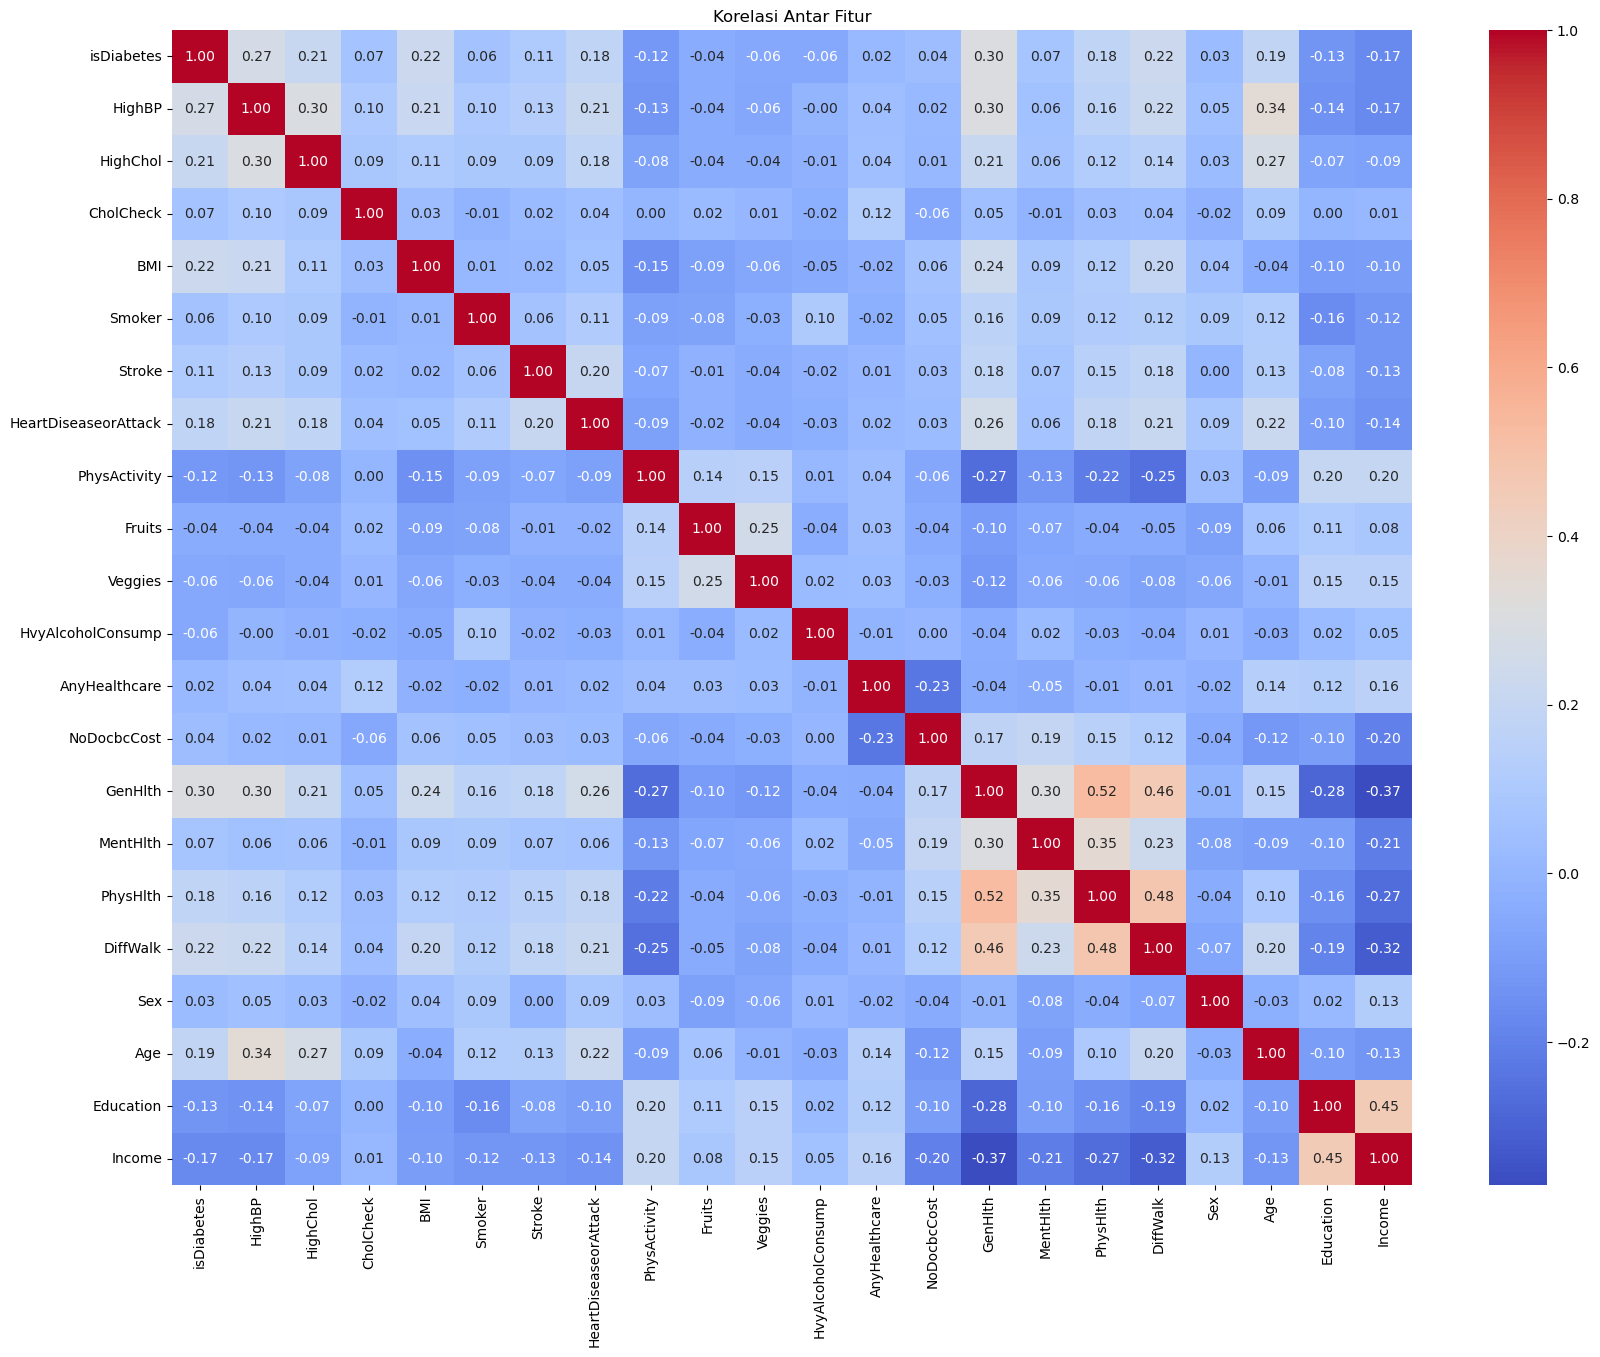

In [13]:
# Korelasi antar fitur
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antar Fitur")
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_38988\1470315821.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette=colors)


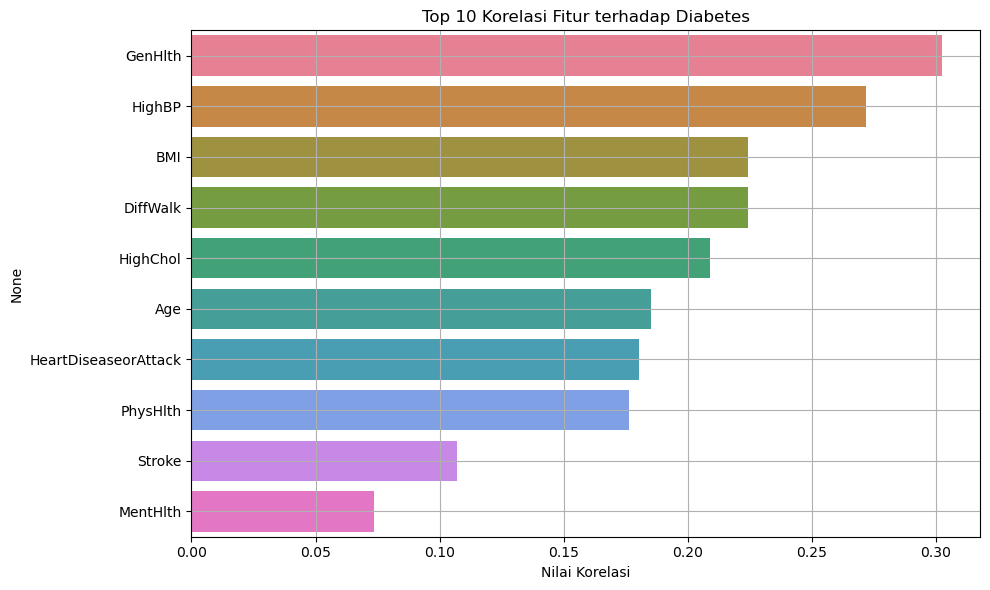

In [14]:
# Hitung korelasi terhadap kolom target 'Diabetes'
correlation_with_target = df.corr(numeric_only=True)['isDiabetes'].sort_values(ascending=False)

# Visualisasi korelasi top 10 fitur (kecuali kolom target itu sendiri)
top_corr_features = correlation_with_target.drop('isDiabetes').head(10)

# Buat ulang visualisasi dengan warna berbeda untuk setiap kolom
plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", len(top_corr_features))  # palet warna berbeda
sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette=colors)
plt.title('Top 10 Korelasi Fitur terhadap Diabetes')
plt.xlabel('Nilai Korelasi')
plt.tight_layout()
plt.grid(True)
plt.show()

Berdasarkan hasil nilai korelasi kolom GenHlth, HighBP, BMI, DiffWalk, HighChol, Age, HeartDiseaseorAttack, PhysHlth, Stroke, MentHlth memiliki nilai korelasi tertinggi dengan isDiabetes. Meskipun tidak terlalu siginifikan

In [15]:
target = 'isDiabetes'
bool_vars = (data_mapping.nunique()[data_mapping.nunique() == 2]
                .index
                .drop(labels='isDiabetes', errors='ignore'))
num_vars = [var for var in data_mapping.columns if var not in bool_vars and var != 'isDiabetes']

In [16]:
# Warna bisa ditambah sesuai kebutuhan
colors = ['#be4d25', '#2596be', '#b3be25']  # Tambahkan 3 warna

def analyse_cat(var, df):
    (df.groupby('isDiabetes')[var]
     .value_counts(normalize=True)
     .unstack()
     .iloc[:, ::-1]
     .plot(kind='barh', stacked=True, figsize=(10, 3), color=colors[:len(df[var].unique())], alpha=1))

    plt.title(var, fontsize=18)
    plt.xlabel('Proportion')
    plt.ylabel('Diabetes Category')

    plt.legend(title=var, bbox_to_anchor=(1, 1), frameon=False)
    plt.yticks(ticks=range(3), labels=['No Diabetes', 'Pre-Diabetes', 'Diabetes'])
    plt.tight_layout()
    plt.show()

Pada grafik di bawah, memeriksa persentase yang mewakili setiap variabel kategori untuk orang dengan dan tanpa diabetes.


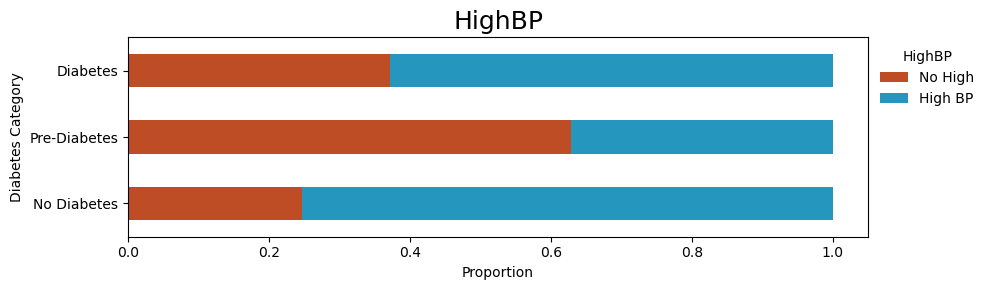

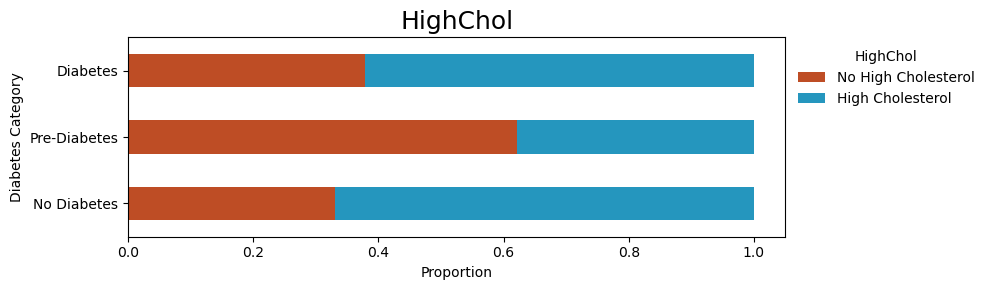

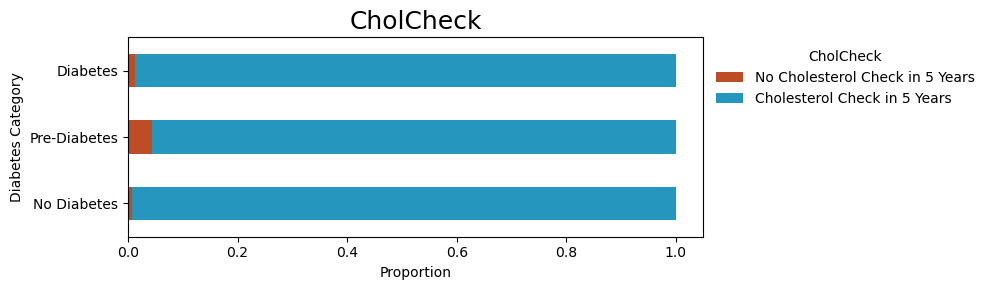

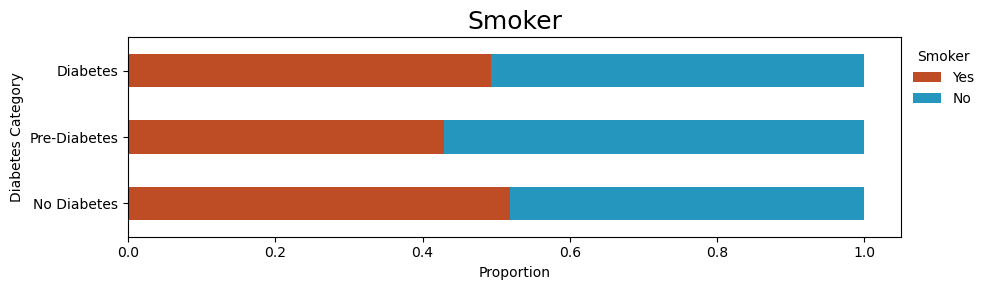

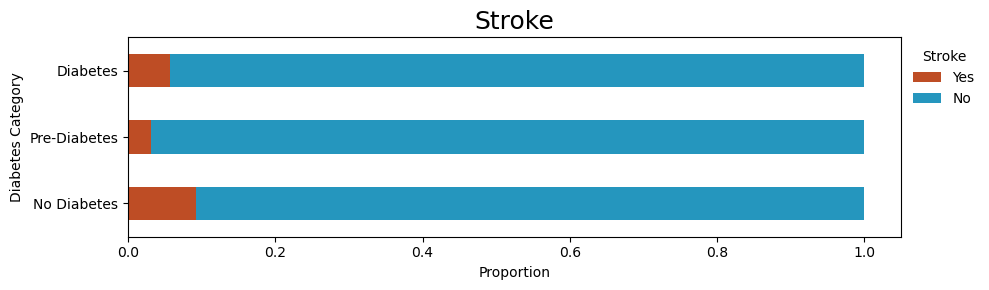

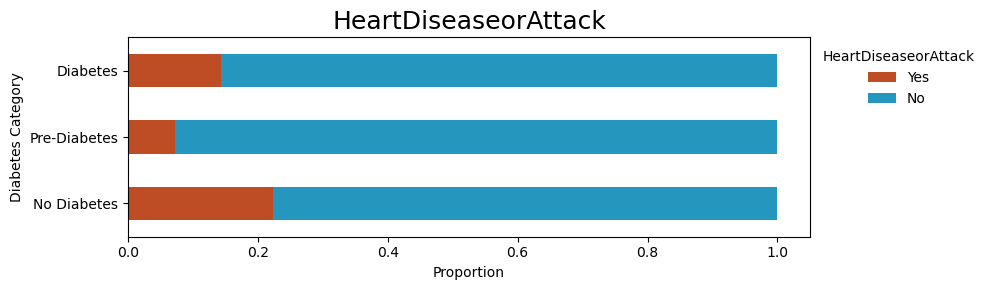

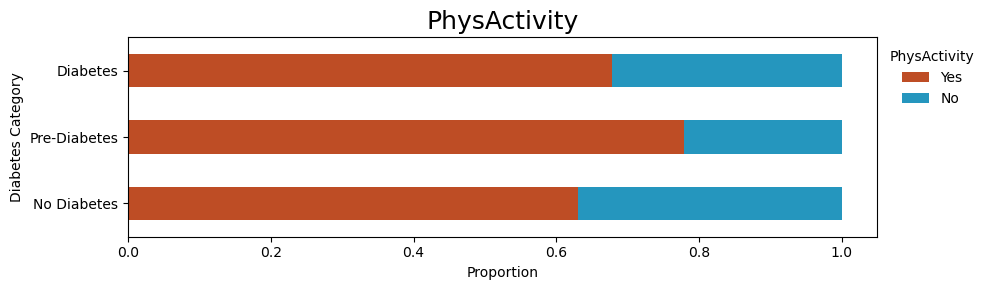

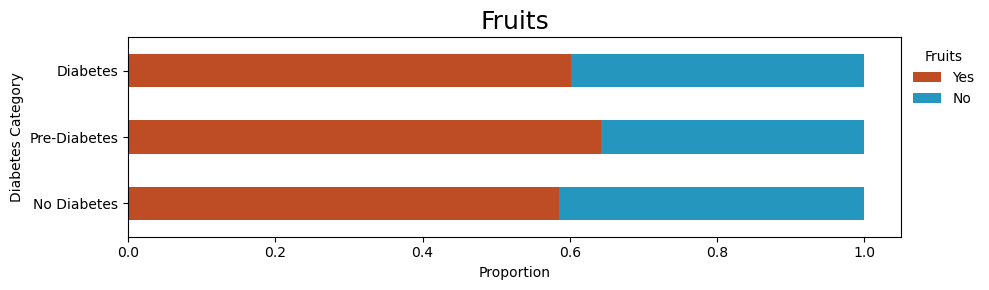

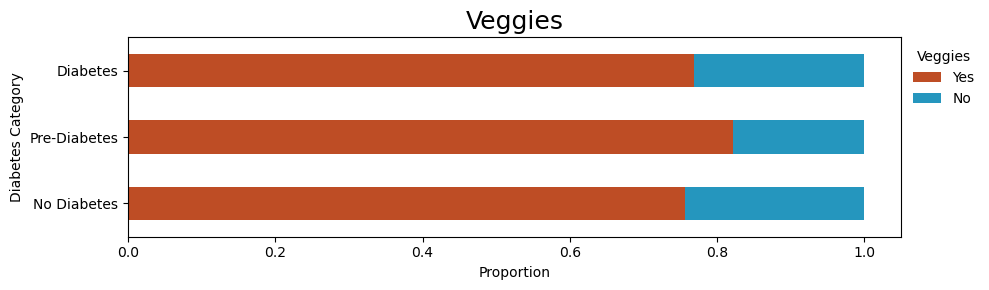

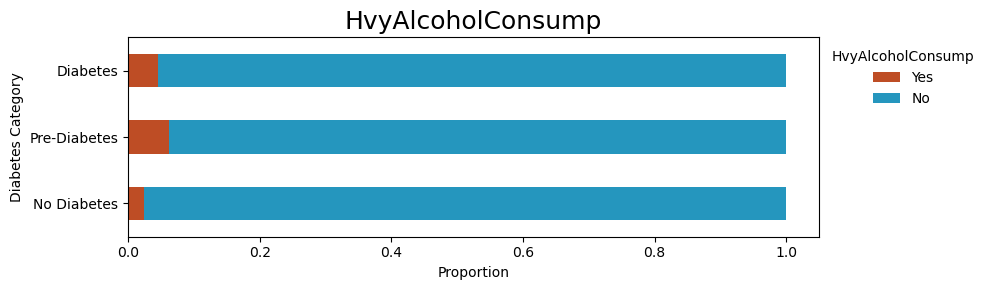

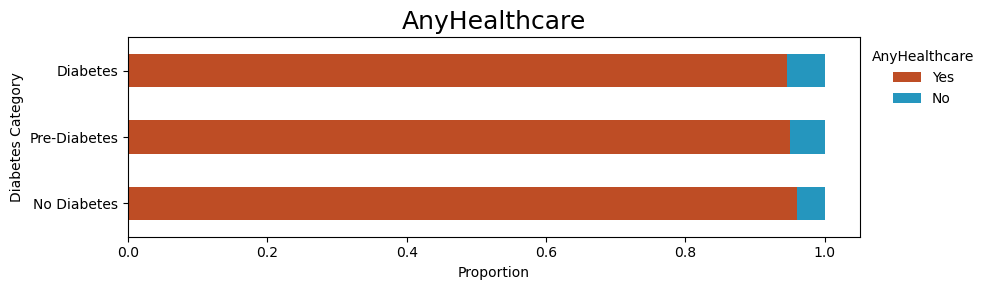

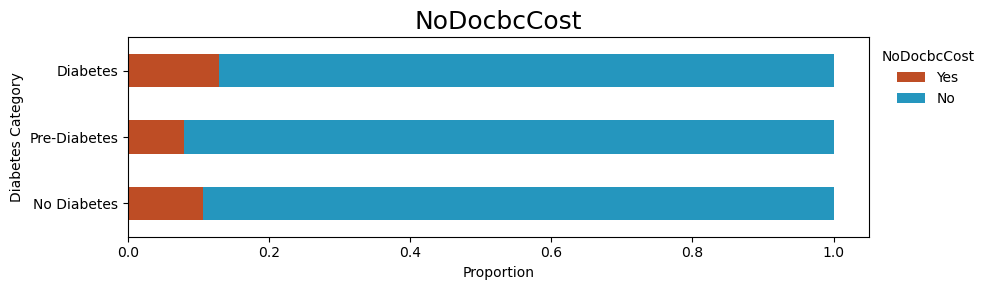

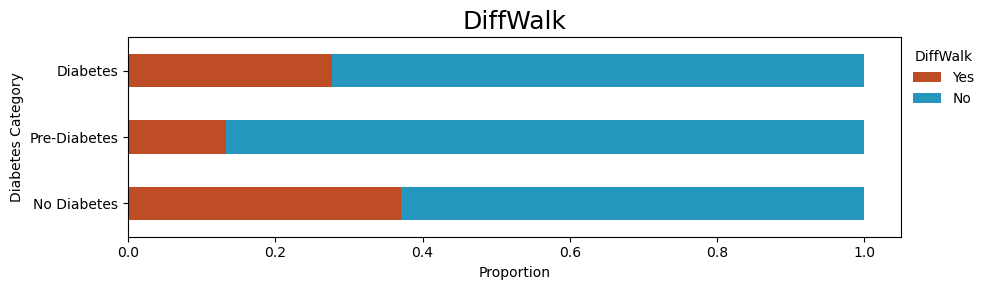

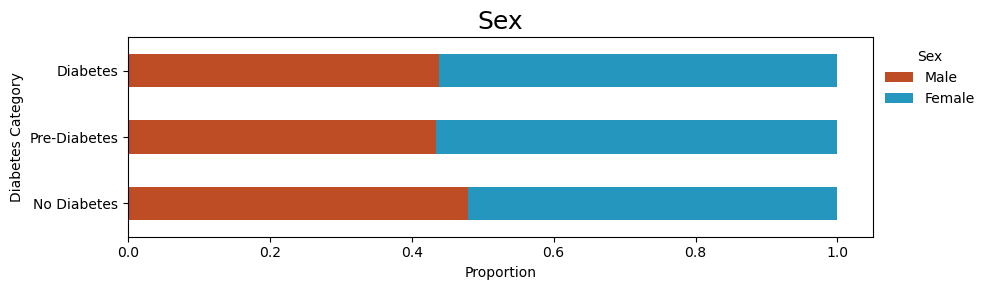

In [17]:
for col in bool_vars:
    analyse_cat(col, data_mapping)

# **5. Data Preprocessing**

### Cek Missing Value

In [18]:
df.isnull().sum()

isDiabetes              0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

### Cek Duplikat

In [19]:
duplicates = df[df.duplicated()]
print("Duplicate Rows : ",len(duplicates))
duplicates.head()

Duplicate Rows :  23899


,isDiabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,2,1,1,1,27,1,0,0,0,0,...,1,0,5,0,30,1,0,10,4,5
1563,0,0,0,1,21,1,0,0,1,1,...,1,0,1,0,0,0,0,4,6,8
2700,0,0,0,1,32,0,0,0,1,1,...,1,0,2,0,0,0,0,5,6,8
3160,0,0,0,1,21,0,0,0,1,1,...,1,0,1,0,0,0,0,4,6,8
3332,0,0,0,1,24,0,0,0,1,1,...,1,0,1,0,0,0,1,9,6,8


In [20]:
df.drop_duplicates(inplace=True)
print("Duplicate Rows after removing : ", len(df[df.duplicated()]))

Duplicate Rows after removing :  0


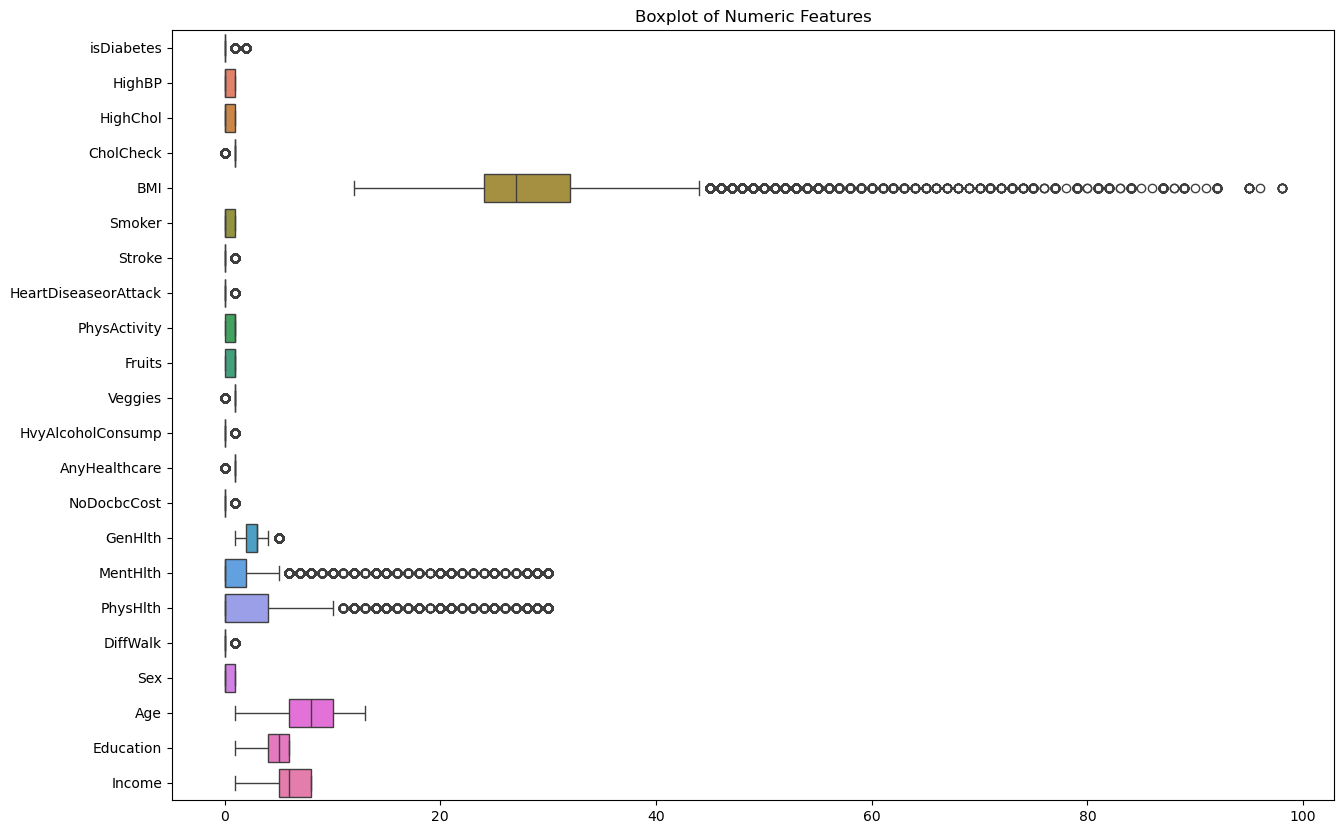

In [21]:
# Cek outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numeric_columns], orient='h')
plt.title('Boxplot of Numeric Features')    
plt.show()


In [22]:
def bin_bmi(bmi):
    if bmi < 18.5:
        return 1
    elif 18.5 <= bmi < 24.9:
        return 2
    elif 25 <= bmi < 29.9:
        return 4
    else:
        return 5
    
df['BMI_Category'] = df['BMI'].apply(bin_bmi)

In [23]:
df.head()

,isDiabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_Category
0,0,1,1,1,40,1,0,0,0,0,...,0,5,18,15,1,0,9,4,3,5
1,0,0,0,0,25,1,0,0,1,0,...,1,3,0,0,0,0,7,6,1,4
2,0,1,1,1,28,0,0,0,0,1,...,1,5,30,30,1,0,9,4,8,4
3,0,1,0,1,27,0,0,0,1,1,...,0,2,0,0,0,0,11,3,6,4
4,0,1,1,1,24,0,0,0,1,1,...,0,2,3,0,0,0,11,5,4,2


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229781 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   isDiabetes            229781 non-null  int32
 1   HighBP                229781 non-null  int32
 2   HighChol              229781 non-null  int32
 3   CholCheck             229781 non-null  int32
 4   BMI                   229781 non-null  int32
 5   Smoker                229781 non-null  int32
 6   Stroke                229781 non-null  int32
 7   HeartDiseaseorAttack  229781 non-null  int32
 8   PhysActivity          229781 non-null  int32
 9   Fruits                229781 non-null  int32
 10  Veggies               229781 non-null  int32
 11  HvyAlcoholConsump     229781 non-null  int32
 12  AnyHealthcare         229781 non-null  int32
 13  NoDocbcCost           229781 non-null  int32
 14  GenHlth               229781 non-null  int32
 15  MentHlth              229781 non-null  

In [25]:
# Fitur target
target_col = "isDiabetes"

# Fitur numerik murni (scaling)
numerical_features = ["BMI", "MentHlth", "PhysHlth"]

# Fitur ordinal (berurutan)
ordinal_features = ["GenHlth", "Age", "Education", "Income", "BMI_Category"]

# Fitur kategorikal biner (label encoding)
binary_categorical_features = [
    "HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", "HeartDiseaseorAttack",
    "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare",
    "NoDocbcCost", "DiffWalk", "Sex"
]
preprocessing_info = {
    "numerical_features": numerical_features,
    "ordinal_features": ordinal_features,
    "binary_categorical_features": binary_categorical_features,
    "target": target_col
}

In [26]:
def full_preprocessing_pipeline(df, binary_features, numerical_features, ordinal_features,
                                save_dir="../model", output_csv_name="../final_preprocessed_diabetes.csv"):
    df = df.copy()

    # Step 1: Label Encoding untuk fitur biner
    for feature in binary_features:
        encoder = LabelEncoder()
        encoder.fit(df[feature])
        df[feature] = encoder.transform(df[feature])
        joblib.dump(encoder, f"{save_dir}/encoder_{feature}.joblib")

    # Step 2: Scaling untuk fitur numerik
    for feature in numerical_features:
        scaler = MinMaxScaler()
        X = df[feature].values.reshape(-1, 1)
        scaler.fit(X)
        df[feature] = scaler.transform(X)
        joblib.dump(scaler, f"{save_dir}/scaler_{feature}.joblib")

    # Step 3: Ordinal Encoding untuk fitur ordinal
    ordinal_encoder = OrdinalEncoder()
    df[ordinal_features] = ordinal_encoder.fit_transform(df[ordinal_features])
    joblib.dump(ordinal_encoder, f"{save_dir}/ordinal_encoder.joblib")

    # Simpan hasil akhir
    final_path = f"{save_dir}/{output_csv_name}"
    df.to_csv(final_path, index=False, header=True)

    return df, final_path

# Jalankan pipeline pada dataset awal
df_processed, final_output_path = full_preprocessing_pipeline(
    df=df,
    binary_features=preprocessing_info['binary_categorical_features'],
    numerical_features=preprocessing_info['numerical_features'],
    ordinal_features=preprocessing_info['ordinal_features']
)

In [27]:
df_processed['BMI_Category']

0         3.0
1         2.0
2         2.0
3         2.0
4         1.0
         ... 
253675    3.0
253676    0.0
253677    2.0
253678    1.0
253679    2.0
Name: BMI_Category, Length: 229781, dtype: float64

In [28]:
df_processed[df_processed['BMI_Category'] == 1]

,isDiabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_Category
4,0,1,1,1,0.139535,0,0,0,1,1,...,0,1.0,0.1,0.000000,0,0,10.0,4.0,3.0,1.0
9,0,0,0,1,0.139535,0,0,0,0,0,...,0,1.0,0.0,0.000000,0,1,7.0,3.0,2.0,1.0
16,0,1,1,1,0.104651,0,0,0,1,1,...,0,2.0,0.0,0.000000,0,0,9.0,3.0,2.0,1.0
17,2,0,0,1,0.127907,1,0,0,1,0,...,0,1.0,0.0,0.000000,0,1,6.0,4.0,5.0,1.0
18,0,0,0,0,0.127907,0,0,0,0,0,...,0,1.0,0.5,0.000000,0,0,1.0,5.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253657,0,0,1,1,0.139535,0,0,0,0,0,...,0,2.0,0.0,0.000000,0,0,6.0,4.0,2.0,1.0
253663,0,0,0,1,0.127907,0,0,0,0,1,...,1,1.0,0.0,1.000000,0,0,4.0,5.0,1.0,1.0
253666,1,1,0,1,0.127907,0,0,0,0,1,...,0,2.0,0.0,0.500000,0,0,5.0,4.0,1.0,1.0
253671,0,1,1,1,0.127907,0,1,1,0,0,...,1,3.0,0.0,0.166667,0,1,7.0,2.0,1.0,1.0
